**AI-Usage** 

I utilized chat gpt to help me throughout this process. It gave me an outline of how to extract the features and target variables, intialize the models, and compute performance metrics to analyze the different models. After understanding how to perform this process for one model, I got help creating loops to loop through the different models and print out the performance metrics in an organized manner. Upon completing this portion of the machine learning process, it helped guide me towards understanding which features are most important and how to make predictions for a specfic player's passing yards. I provided more details towards how I engineered the code using prompts above their code blocks. 

The code developed in this file was guided by this conversation with ChatGPT.

**Here is the link to that chat:** https://chatgpt.com/share/67a7d9ef-d054-800f-a70d-36bf42bdf994

In [899]:
import pandas as pd
import numpy as np

# Load the dataset
qb_df = pd.read_csv("player_position_dataframes/clean_qb.csv")

display(qb_df)

# Checking to see if the list contains only quarterbacks 
print(qb_df['pfr_player_name'].unique()) 

,player_id,player_name,pfr_player_name,position,recent_team,week,season_type,opponent_team,passing_yards,passing_tds,...,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,offense_snaps,offense_pct
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,1,REG,SF,167,1,...,1.0,82.837302,13.0,61.904762,72.558512,-10.653750,19.915377,40.823210,38,0.75
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,2,REG,TEN,176,2,...,0.0,98.750000,18.0,60.000000,67.851451,-7.851451,19.087849,52.851567,57,1.00
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,3,REG,NE,281,2,...,0.0,118.869048,27.0,77.142857,67.638107,9.504750,19.648404,32.873395,73,1.00
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,4,REG,DEN,225,0,...,0.0,72.023810,24.0,57.142857,67.652290,-10.509432,19.960963,39.107162,74,1.00
4,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,5,REG,MIN,244,2,...,3.0,54.861111,29.0,53.703704,66.891636,-13.187932,20.394048,40.734126,72,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,00-0039918,C.Williams,Caleb Williams,QB,CHI,14,REG,SF,134,2,...,0.0,116.938406,17.0,73.913043,73.322051,0.590993,20.952260,36.292903,49,0.92
521,00-0039918,C.Williams,Caleb Williams,QB,CHI,15,REG,MIN,191,1,...,0.0,86.895161,18.0,58.064516,62.604289,-4.539772,22.596859,46.472393,64,0.96
522,00-0039918,C.Williams,Caleb Williams,QB,CHI,16,REG,DET,334,2,...,0.0,107.708333,26.0,65.000000,61.272584,3.727416,21.701507,53.100679,64,1.00
523,00-0039918,C.Williams,Caleb Williams,QB,CHI,17,REG,SEA,122,0,...,1.0,52.976190,16.0,57.142857,63.191599,-6.048742,20.304159,39.255328,61,1.00


['Aaron Rodgers' 'Matthew Stafford' 'Andy Dalton' 'Russell Wilson'
 'Kirk Cousins' 'Geno Smith' 'Derek Carr' 'Jameis Winston' 'Dak Prescott'
 'Jared Goff' 'Jacoby Brissett' 'Deshaun Watson' 'Cooper Rush'
 'Patrick Mahomes' 'Lamar Jackson' 'Baker Mayfield' 'Josh Allen'
 'Sam Darnold' 'Kyler Murray' 'Gardner Minshew' 'Drew Lock' 'Daniel Jones'
 'Tua Tagovailoa' 'Jordan Love' 'Justin Herbert' 'Jalen Hurts'
 'Joe Burrow' 'Justin Fields' 'Trevor Lawrence' 'Mac Jones' 'Brock Purdy'
 'Bryce Young' 'Will Levis' 'C.J. Stroud' 'Anthony Richardson' 'Bo Nix'
 'Drake Maye' 'Jayden Daniels' 'Caleb Williams']


In [900]:
columns_to_drop = [
    'carries', 
    'rushing_yards_before_contact', 
    'rushing_yards_before_contact_avg', 
    'rushing_yards_after_contact', 
    'rushing_yards_after_contact_avg', 
    'rushing_broken_tackles',
    'pass_yards',
    'pass_touchdowns'
]

qb_df = qb_df.drop(columns=columns_to_drop)


In [901]:
# Drop rows with NaN values in any column
qb_df = qb_df.dropna()

# qb_df = pd.get_dummies(qb_df, columns=['recent_team', 'opponent_team'], drop_first=True)

# X = qb_df.drop(columns=['player_id', 'player_name'])

print(qb_df.columns)

Index(['player_id', 'player_name', 'pfr_player_name', 'position',
       'recent_team', 'week', 'season_type', 'opponent_team', 'passing_yards',
       'passing_tds', 'sacks', 'sack_yards', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'rushing_yards', 'rushing_tds',
       'fantasy_points', 'fantasy_points_ppr', 'passing_drops',
       'passing_drop_pct', 'passing_bad_throws', 'passing_bad_throw_pct',
       'times_sacked', 'times_blitzed', 'times_hurried', 'times_hit',
       'times_pressured', 'times_pressured_pct', 'avg_time_to_throw',
       'avg_completed_air_yards', 'avg_intended_air_yards',
       'avg_air_yards_differential', 'aggressiveness',
       'max_completed_air_distance', 'avg_air_yards_to_sticks', 'attempts',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 

In [902]:
qb_df = qb_df.copy()

qb_df = qb_df.sort_values(by=['player_id', 'week'])

# Rolling Averages (Last 3 Games, Last 5 Games, Season Avg)
rolling_windows = [3, 5]  # Last 3 games, last 5 games

rolling_cols = [
    'passing_yards', 'passing_tds', 'sacks', 'sack_yards', 'passing_air_yards',
    'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
    'passing_2pt_conversions', 'pacr', 'rushing_yards', 'rushing_tds',
    'fantasy_points', 'fantasy_points_ppr', 'passing_drops',
    'passing_drop_pct', 'passing_bad_throws', 'passing_bad_throw_pct',
    'times_sacked', 'times_blitzed', 'times_hurried', 'times_hit',
    'times_pressured', 'times_pressured_pct', 'avg_time_to_throw',
    'avg_completed_air_yards', 'avg_intended_air_yards',
    'avg_air_yards_differential', 'aggressiveness',
    'max_completed_air_distance', 'avg_air_yards_to_sticks', 'attempts',
    'interceptions', 'passer_rating',
    'completions', 'completion_percentage',
    'expected_completion_percentage',
    'completion_percentage_above_expectation', 'avg_air_distance',
    'max_air_distance', 'offense_snaps', 'offense_pct'
]

"""
https://chatgpt.com/share/67c7a70a-4c10-800f-acbb-4f83485888e0 
https://chatgpt.com/share/67c7a740-aecc-800f-9566-8ffc39e10d21 

I referred to these conversations when fixing the rolling data frame calculations. I was running into trouble
with my original code as it was not taking into account seperate players correctly and ensuring that each players 
first week of rolling averages was all 0s. I asked for help to fix these aspects of the rolling average calculations 
both the rolling 3 and 5 games along with the season average. It took some back and forth with ChatGPT, however
I was eventaully able to implement these features correctly based on the code provided by using loops for setting 
the initial rows to 0s and using a lambda function to calulcate rolling averages for each player.

I switched chats to ask a question about excel and accidentally continued to use that chat. I included links to all 
conversations utilized to implement this code 
"""

qb_df = qb_df.sort_values(by=['player_id', 'week']).reset_index(drop=True)

# Identify the first week for each player
first_week_indices = qb_df.groupby('player_id').head(1).index

# Initialize rolling average columns with 0 for the first week of each player
for window in rolling_windows:
    for col in rolling_cols:
        qb_df[f'{col}_rolling_{window}'] = 0  # Default all to 0

# Set rolling and seasonal average values to 0 for each QB's first week
qb_df.loc[first_week_indices, [f'{col}_rolling_{window}' for col in rolling_cols for window in rolling_windows]] = 0
qb_df.loc[first_week_indices, [f'{col}_season_avg' for col in rolling_cols]] = 0

# Compute rolling averages for each player separately, using `group_keys=False`
for window in rolling_windows:
    for col in rolling_cols:
        qb_df[f'{col}_rolling_{window}'] = (
            qb_df.groupby('player_id', group_keys=False)[col]
            .apply(lambda x: x.shift(1).rolling(window, min_periods=1).mean())
        )

# Now calculate expanding seasonal averages for each player in a single operation
for col in rolling_cols:
    qb_df[f'{col}_season_avg'] = (
        qb_df.groupby('player_id', group_keys=False)[col]
        .apply(lambda x: x.shift(1).expanding(min_periods=1).mean())
    )

# Reset index to maintain order
qb_df = qb_df.reset_index(drop=True)

# Display the DataFrame
display(qb_df.head())

,player_id,player_name,pfr_player_name,position,recent_team,week,season_type,opponent_team,passing_yards,passing_tds,...,interceptions_season_avg,passer_rating_season_avg,completions_season_avg,completion_percentage_season_avg,expected_completion_percentage_season_avg,completion_percentage_above_expectation_season_avg,avg_air_distance_season_avg,max_air_distance_season_avg,offense_snaps_season_avg,offense_pct_season_avg
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,1,REG,SF,167,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,2,REG,TEN,176,2,...,1.000000,82.837302,13.000000,61.904762,72.558512,-10.653750,19.915377,40.823210,38.0,0.750000
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,3,REG,NE,281,2,...,0.500000,90.793651,15.500000,60.952381,70.204982,-9.252601,19.501613,46.837388,47.5,0.875000
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,4,REG,DEN,225,0,...,0.333333,100.152116,19.333333,66.349206,69.349357,-3.000151,19.550543,42.182724,56.0,0.916667
4,00-0023459,A.Rodgers,Aaron Rodgers,QB,NYJ,5,REG,MIN,244,2,...,0.250000,93.120040,20.500000,64.047619,68.925090,-4.877471,19.653148,41.413833,60.5,0.937500


In [903]:
# Replace all NaN values with 0 in the entire DataFrame
qb_df = qb_df.fillna(0)

# create a csv file to store the data
qb_df.to_csv("player_position_dataframes/rolling_qb_features.csv", index=False)

In [904]:
rolling_3 = [
    "passing_yards_rolling_3", "passing_tds_rolling_3", "sacks_rolling_3", "sack_yards_rolling_3",
    "passing_air_yards_rolling_3", "passing_yards_after_catch_rolling_3", "passing_first_downs_rolling_3",
    "passing_epa_rolling_3", "passing_2pt_conversions_rolling_3", "pacr_rolling_3", "rushing_yards_rolling_3",
    "rushing_tds_rolling_3", "fantasy_points_rolling_3", "fantasy_points_ppr_rolling_3", "passing_drops_rolling_3",
    "passing_drop_pct_rolling_3", "passing_bad_throws_rolling_3", "passing_bad_throw_pct_rolling_3",
    "times_sacked_rolling_3", "times_blitzed_rolling_3", "times_hurried_rolling_3", "times_hit_rolling_3",
    "times_pressured_rolling_3", "times_pressured_pct_rolling_3", "avg_time_to_throw_rolling_3",
    "avg_completed_air_yards_rolling_3", "avg_intended_air_yards_rolling_3", "avg_air_yards_differential_rolling_3",
    "aggressiveness_rolling_3", "max_completed_air_distance_rolling_3", "avg_air_yards_to_sticks_rolling_3",
    "attempts_rolling_3", "interceptions_rolling_3",
    "passer_rating_rolling_3", "completions_rolling_3", "completion_percentage_rolling_3",
    "expected_completion_percentage_rolling_3", "completion_percentage_above_expectation_rolling_3",
    "avg_air_distance_rolling_3", "max_air_distance_rolling_3", "offense_snaps_rolling_3", "offense_pct_rolling_3"
]

rolling_5 = [
    "passing_yards_rolling_5", "passing_tds_rolling_5", "sacks_rolling_5", "sack_yards_rolling_5",
    "passing_air_yards_rolling_5", "passing_yards_after_catch_rolling_5", "passing_first_downs_rolling_5",
    "passing_epa_rolling_5", "passing_2pt_conversions_rolling_5", "pacr_rolling_5", "rushing_yards_rolling_5",
    "rushing_tds_rolling_5", "fantasy_points_rolling_5", "fantasy_points_ppr_rolling_5", "passing_drops_rolling_5",
    "passing_drop_pct_rolling_5", "passing_bad_throws_rolling_5", "passing_bad_throw_pct_rolling_5",
    "times_sacked_rolling_5", "times_blitzed_rolling_5", "times_hurried_rolling_5", "times_hit_rolling_5",
    "times_pressured_rolling_5", "times_pressured_pct_rolling_5", "avg_time_to_throw_rolling_5",
    "avg_completed_air_yards_rolling_5", "avg_intended_air_yards_rolling_5", "avg_air_yards_differential_rolling_5",
    "aggressiveness_rolling_5", "max_completed_air_distance_rolling_5", "avg_air_yards_to_sticks_rolling_5",
    "attempts_rolling_5",  "interceptions_rolling_5",
    "passer_rating_rolling_5", "completions_rolling_5", "completion_percentage_rolling_5",
    "expected_completion_percentage_rolling_5", "completion_percentage_above_expectation_rolling_5",
    "avg_air_distance_rolling_5", "max_air_distance_rolling_5", "offense_snaps_rolling_5", "offense_pct_rolling_5"
]

season_avg = [
    "passing_yards_season_avg", "passing_tds_season_avg", "sacks_season_avg", "sack_yards_season_avg",
    "passing_air_yards_season_avg", "passing_yards_after_catch_season_avg", "passing_first_downs_season_avg",
    "passing_epa_season_avg", "passing_2pt_conversions_season_avg", "pacr_season_avg", "rushing_yards_season_avg",
    "rushing_tds_season_avg", "fantasy_points_season_avg", "fantasy_points_ppr_season_avg", "passing_drops_season_avg",
    "passing_drop_pct_season_avg", "passing_bad_throws_season_avg", "passing_bad_throw_pct_season_avg",
    "times_sacked_season_avg", "times_blitzed_season_avg", "times_hurried_season_avg", "times_hit_season_avg",
    "times_pressured_season_avg", "times_pressured_pct_season_avg", "avg_time_to_throw_season_avg",
    "avg_completed_air_yards_season_avg", "avg_intended_air_yards_season_avg", "avg_air_yards_differential_season_avg",
    "aggressiveness_season_avg", "max_completed_air_distance_season_avg", "avg_air_yards_to_sticks_season_avg",
    "attempts_season_avg", "interceptions_season_avg",
    "passer_rating_season_avg", "completions_season_avg", "completion_percentage_season_avg",
    "expected_completion_percentage_season_avg", "completion_percentage_above_expectation_season_avg",
    "avg_air_distance_season_avg", "max_air_distance_season_avg", "offense_snaps_season_avg", "offense_pct_season_avg"
]

In [905]:
# I have utilized AI in the process of improving the model performance. It has helped
# me interpert the results and told me how I should adjust my approach to improve on 
# the current limiations of my models. It also helped me implement weights for my features
# however they ended up not being necessary and had no affect on the model. One thing that it 
# it did help me implement was the correlation matrix which has been helpful in determining what
# features to use

# Link to conversation: https://chatgpt.com/share/67b67c5f-34d0-800f-b7ee-5d1104c030b2

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

features = ['passing_first_downs_rolling_5', 'passing_first_downs_rolling_3', 'completions_rolling_5', 'completions_rolling_3', 'passing_yards_rolling_5', 'completion_percentage_rolling_5', 'passing_yards_rolling_3', 'attempts_rolling_3', 'passing_tds_rolling_5', 'passing_tds_rolling_3', 'passing_epa_rolling_5', 'attempts_rolling_5', 'offense_snaps_rolling_3', 'completion_percentage_rolling_3', 'passing_yards_after_catch_rolling_5', 'passing_yards_after_catch_rolling_3', 'offense_snaps_rolling_5','passing_first_downs_season_avg', 'completion_percentage_season_avg', 'passing_epa_season_avg', 'passing_yards_season_avg', 'passer_rating_season_avg', 'pacr_season_avg', 'completions_season_avg', 'passing_tds_season_avg', 'expected_completion_percentage_season_avg']

qb_df = qb_df[qb_df[features].sum(axis=1) != 0]

# Define target variable
target = "passing_yards"

# Split data into features (X) and target (y)
X = qb_df[features]
y = qb_df[target]

# Scale features using StandardScaler
scaler = preprocessing.StandardScaler()
X_scaled = X

# Split into training and test sets (85% train, 15% test)
scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

print(qb_df[features].head())

   passing_first_downs_rolling_5  passing_first_downs_rolling_3  \
1                           8.00                       8.000000   
2                           8.50                       8.500000   
3                          11.00                      11.000000   
4                          10.75                      11.666667   
5                          11.20                      13.000000   

   completions_rolling_5  completions_rolling_3  passing_yards_rolling_5  \
1              13.000000              13.000000                   167.00   
2              15.500000              15.500000                   171.50   
3              19.333333              19.333333                   208.00   
4              20.500000              23.000000                   212.25   
5              22.200000              26.666667                   218.60   

   completion_percentage_rolling_5  passing_yards_rolling_3  \
1                        61.904762               167.000000   
2             

In [906]:
# Print the first few rows to verify shifting
print(qb_df[['player_id', 'week', 'passing_yards']].head(10))

# Test for a single player
player_data = qb_df[qb_df['pfr_player_name'] == 'Aaron Rodgers']
print(player_data[['passing_yards']])

# create a csv file to store the data
qb_df.to_csv("player_position_dataframes/cleaned_model_data.csv", index=False)

     player_id  week  passing_yards
1   00-0023459     2            176
2   00-0023459     3            281
3   00-0023459     4            225
4   00-0023459     5            244
5   00-0023459     6            294
6   00-0023459     7            276
7   00-0023459     8            233
8   00-0023459     9            211
9   00-0023459    10            151
10  00-0023459    11            184
    passing_yards
1             176
2             281
3             225
4             244
5             294
6             276
7             233
8             211
9             151
10            184
11            185
12            339
13            289
14            256
15            112
16            274


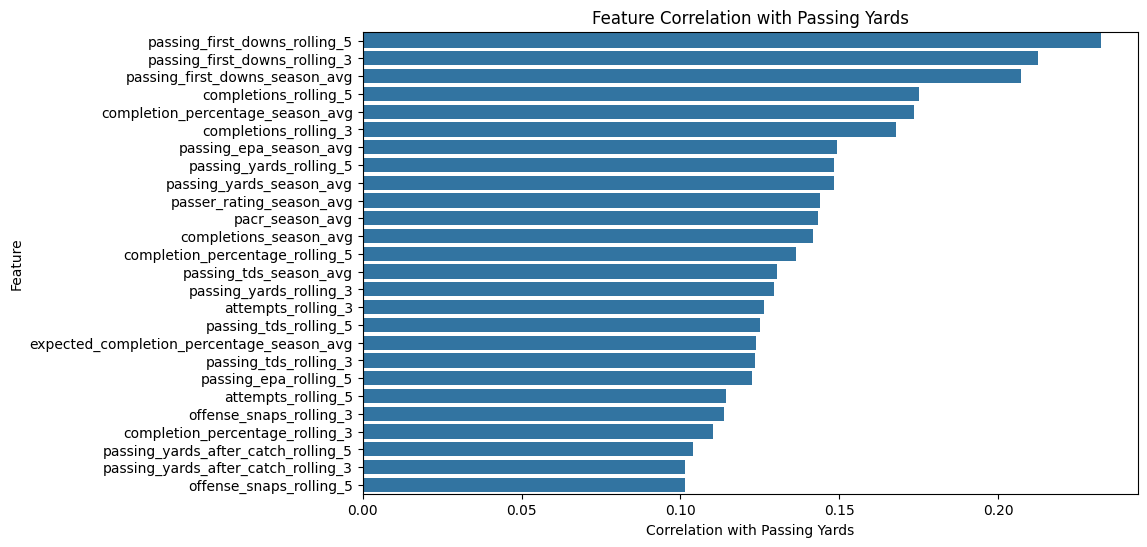

['passing_first_downs_rolling_5', 'passing_first_downs_rolling_3', 'passing_first_downs_season_avg', 'completions_rolling_5', 'completion_percentage_season_avg', 'completions_rolling_3', 'passing_epa_season_avg', 'passing_yards_rolling_5', 'passing_yards_season_avg', 'passer_rating_season_avg', 'pacr_season_avg', 'completions_season_avg', 'completion_percentage_rolling_5', 'passing_tds_season_avg', 'passing_yards_rolling_3', 'attempts_rolling_3', 'passing_tds_rolling_5', 'expected_completion_percentage_season_avg', 'passing_tds_rolling_3', 'passing_epa_rolling_5']


In [907]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = qb_df[features + [target]].corr()

# Get correlations with passing yards
passing_yards_corr = corr_matrix[target].drop(target).sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=passing_yards_corr.values, y=passing_yards_corr.index)
plt.xlabel("Correlation with Passing Yards")
plt.ylabel("Feature")
plt.title("Feature Correlation with Passing Yards")
plt.show()

filtered_features = passing_yards_corr[passing_yards_corr > 0.12].index.tolist()
print(filtered_features)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# I was asking Chat for help improving the accuracy of the models and explain different aspects of ML.
# ChatGPT pointed me to the varience inflation factor to help pick out which features are most important 
# Link to Chat: https://chatgpt.com/share/67ca63eb-e104-800f-95e6-c309b85e74cd

vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X.shape[1])]

print(vif_data)

# Set a VIF threshold (commonly 5 or 10)
vif_threshold = 1000 

# Filter features with VIF below the threshold
filtered_features = vif_data[vif_data["VIF"] < vif_threshold]["Feature"].tolist()

# Print the filtered list of features
print(filtered_features)

                                      Feature           VIF
0               passing_first_downs_rolling_5   1621.245622
1               passing_first_downs_rolling_3    584.284234
2                       completions_rolling_5  11360.952917
3                       completions_rolling_3  10001.774784
4                     passing_yards_rolling_5   1823.905873
5             completion_percentage_rolling_5  11681.501289
6                     passing_yards_rolling_3    710.387130
7                          attempts_rolling_3  10450.234162
8                       passing_tds_rolling_5     92.525875
9                       passing_tds_rolling_3     39.746821
10                      passing_epa_rolling_5     31.673656
11                         attempts_rolling_5  11760.150016
12                    offense_snaps_rolling_3   1016.077988
13            completion_percentage_rolling_3   9456.763670
14        passing_yards_after_catch_rolling_5    312.451404
15        passing_yards_after_catch_roll

In [909]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X, y)
selected_features = X.columns[lasso.coef_ != 0].tolist()
print("Selected features:", selected_features)


Selected features: ['passing_first_downs_rolling_5', 'passing_yards_rolling_3', 'attempts_rolling_3', 'passing_yards_after_catch_rolling_5', 'passing_yards_after_catch_rolling_3', 'completion_percentage_season_avg', 'passing_yards_season_avg', 'passer_rating_season_avg', 'expected_completion_percentage_season_avg']


In [910]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)

In [911]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Compute metrics
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = scaled_X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mbe = np.mean(y_pred - y_test)

# Print results
print(f"R² Score: {r2:.4f}")
# Adjust for the number of features used to help prevent overfitting
print(f"Adjusted R² Score: {adjusted_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Penalizes larger errors more
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Measures models tendency to over or underestimate values 
print(f"Mean Bias Error (MBE): {mbe:.2f}")

from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model with weights
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")

R² Score: 0.2089
Adjusted R² Score: -0.2808
Mean Absolute Error (MAE): 44.01
Root Mean Squared Error (RMSE): 54.16
Mean Bias Error (MBE): 0.48
Cross-validated MAE: 57.70


In [912]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Support Vector Regression": SVR(kernel="rbf", C=100, epsilon=0.1)
}

# Train and evaluate each model
for name, mdl in models.items():
    mdl.fit(scaled_X_train, y_train)
    y_pred = mdl.predict(scaled_X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = scaled_X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mbe = np.mean(y_pred - y_test)
    
    # Print results with dividers
    print("=" * 50)  # Divider
    print(f"Model: {name}")
    print("=" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adjusted_r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Bias Error (MBE): {mbe:.2f}")
    # Use cross-validation to evaluate the model with weights
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")
    print("\n")  # Blank line for spacing

Model: Linear Regression
R² Score: 0.2089
Adjusted R² Score: -0.2808
Mean Absolute Error (MAE): 44.01
Root Mean Squared Error (RMSE): 54.16
Mean Bias Error (MBE): 0.48
Cross-validated MAE: 57.70


Model: Ridge Regression
R² Score: 0.2055
Adjusted R² Score: -0.2863
Mean Absolute Error (MAE): 44.12
Root Mean Squared Error (RMSE): 54.28
Mean Bias Error (MBE): 0.50
Cross-validated MAE: 57.70


Model: Lasso Regression
R² Score: 0.1971
Adjusted R² Score: -0.3000
Mean Absolute Error (MAE): 44.46
Root Mean Squared Error (RMSE): 54.57
Mean Bias Error (MBE): 0.57
Cross-validated MAE: 57.70


Model: Elastic Net
R² Score: 0.1810
Adjusted R² Score: -0.3261
Mean Absolute Error (MAE): 44.97
Root Mean Squared Error (RMSE): 55.11
Mean Bias Error (MBE): 0.63


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.032e+05, tolerance: 2.119e+02
  model = cd_fast.enet_coordinate_descent(


Cross-validated MAE: 57.70


Model: Support Vector Regression
R² Score: 0.0827
Adjusted R² Score: -0.4851
Mean Absolute Error (MAE): 47.86
Root Mean Squared Error (RMSE): 58.32
Mean Bias Error (MBE): -0.69
Cross-validated MAE: 57.70




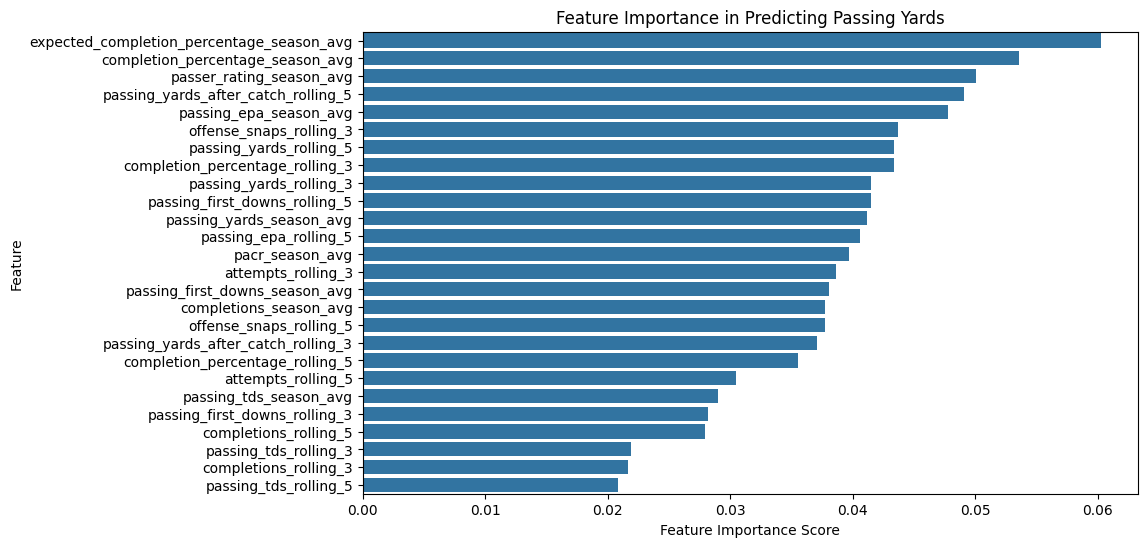

['expected_completion_percentage_season_avg', 'completion_percentage_season_avg', 'passer_rating_season_avg', 'passing_yards_after_catch_rolling_5', 'passing_epa_season_avg', 'offense_snaps_rolling_3', 'passing_yards_rolling_5', 'completion_percentage_rolling_3', 'passing_yards_rolling_3', 'passing_first_downs_rolling_5', 'passing_yards_season_avg', 'passing_epa_rolling_5', 'pacr_season_avg', 'attempts_rolling_3', 'passing_first_downs_season_avg']


In [913]:
from sklearn.ensemble import RandomForestRegressor

# Train a basic Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(scaled_X_train, y_train)

gb = GradientBoostingRegressor(n_estimators=100, max_depth = 7,learning_rate=0.1, random_state=42)
gb.fit(scaled_X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Passing Yards")
plt.show()
plt.show()

# Display the top 20 features as a list
top_20_features = feature_importance_df.head(15)["Feature"].tolist()
print(top_20_features)

In [915]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, random_state=42),
}

# Train and evaluate each model
for name, mdl in models.items():
    mdl.fit(scaled_X_train, y_train)
    y_pred = mdl.predict(scaled_X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = scaled_X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mbe = np.mean(y_pred - y_test)
    
    # Print results with dividers
    print("=" * 50)  # Divider
    print(f"Model: {name}")
    print("=" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adjusted_r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Bias Error (MBE): {mbe:.2f}")
     # Use cross-validation to evaluate the model with weights
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")
    print("\n")  # Blank line for spacing

Model: Random Forest
R² Score: 0.0850
Adjusted R² Score: -0.4814
Mean Absolute Error (MAE): 49.10
Root Mean Squared Error (RMSE): 58.25
Mean Bias Error (MBE): 4.21
Cross-validated MAE: 57.70


Model: Gradient Boosting
R² Score: 0.0411
Adjusted R² Score: -0.5525
Mean Absolute Error (MAE): 48.79
Root Mean Squared Error (RMSE): 59.63
Mean Bias Error (MBE): 4.76
Cross-validated MAE: 57.70


Model: XGBoost
R² Score: -0.1737
Adjusted R² Score: -0.9002
Mean Absolute Error (MAE): 53.85
Root Mean Squared Error (RMSE): 65.97
Mean Bias Error (MBE): 2.64
Cross-validated MAE: 57.70




I was curious how to determine which features were the most significant. I asked ChatGPT how to tell which features were the most significant to my predicitions ,and it helped me to sort and plot my features. I had not seen this before in machine learning ,and it seems like it will be a useful tool when fine tuning the features for the different predicition models

I asked ChatGPT for help on how to use my model to obtain a predicition for a specfic player. It helped provide a framework which I modified to fit the process of how I processed the data, extracted features, and created the models. Once I got the prediction for Aaron Rodgers to work correctly, I provided it with the list of qb's and asked it to help implement a method which went through each qb in the list and performed the predicition process for their week 18 passing yards. The below code is a result of that series of prompts with ChatGPT.

In [916]:
qb_list = ['A.Rodgers', 'J.Flacco', 'J.Johnson', 'M.Stafford', 'A.Dalton', 'T.Taylor',
 'R.Wilson', 'K.Cousins', 'G.Smith', 'T.Bridgewater', 'D.Carr', 'J.Garoppolo',
 'J.Winston', 'T.Heinicke', 'M.Mariota', 'B.Allen', 'C.Wentz', 'D.Prescott',
 'J.Goff', 'J.Brissett', 'N.Mullens', 'D.Watson', 'C.Rush', 'M.Trubisky',
 'P.Mahomes', 'J.Dobbs', 'T.Boyle', 'M.White', 'K.Allen', 'M.Rudolph',
 'L.Jackson', 'B.Mayfield', 'J.Allen', 'S.Darnold', 'J.Browning', 'K.Murray',
 'J.Stidham', 'G.Minshew', 'D.Lock', 'D.Jones', 'T.Huntley', 'T.Tagovailoa',
 'J.Love', 'J.Herbert', 'J.Hurts', 'J.Burrow', 'D.Mills', 'K.Trask', 'J.Fields',
 'T.Lawrence', 'M.Jones', 'T.Lance', 'S.Howell', 'C.Oladokun', 'S.Thompson',
 'B.Purdy', 'K.Pickett', 'B.Zappe', 'D.Ridder', 'M.Willis', 'T.McKee',
 'T.Bagent', 'T.DeVito', 'H.Hooker', "A.O'Connell", 'C.Tune',
 'D.Thompson-Robinson', 'J.Haener', 'B.Young', 'W.Levis', 'C.Stroud',
 'A.Richardson', 'S.Rattler', 'J.Milton', 'B.Nix', 'D.Maye', 'J.Daniels',
 'M.Penix', 'C.Williams']

print("=" * 60)
print("WEEK 18 PASSING YARDS PREDICTIONS")
print("=" * 60)

for qb in qb_list:
    # Filter dataset for current QB in Week 18
    qb_data = qb_df[(qb_df['player_name'] == qb) & (qb_df['week'] == 17)]

    if not qb_data.empty:
        # Extract features and scale
        qb_X = qb_data[features]
        scaled_features = scaler.transform(qb_X)

        # Predict passing yards
        predicted_yards_rf = rf.predict(scaled_features)[0]
        predicted_yards_gb = gb.predict(scaled_features)[0]

        print(f"{qb}:")
        print(f"   - Random Forest: {predicted_yards_rf:.2f} yards")
        print(f"   - Gradient Boosting: {predicted_yards_gb:.2f} yards")
        print("-" * 50)
    else:
        print(f"No Week 18 data found for {qb}")

print("=" * 60)


WEEK 18 PASSING YARDS PREDICTIONS


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.